In [84]:
import numpy as np
import matplotlib.pyplot as plt

# from coin import coin, uniform_pdf, norm_pdf, expon_pdf


import scipy.stats as sps

coin = sps.bernoulli(p=0.5).rvs
uniform_pdf = sps.uniform.pdf
norm_pdf = sps.norm.pdf
expon_pdf = sps.expon.pdf


def uniform(size=1, precision=30):
    shape = (precision, *(size if type(size) == tuple else (size,)))
    return (coin(shape) * np.logspace(np.ones(size), np.ones(size) * precision, num=precision, base=0.5)).sum(0)


def plot_uniform_density(size=200):
    plt.figure(figsize=(16, 9))
    data = uniform(size)
    grid = np.linspace(-.25, 1.25, 500)
    plt.hist(data, bins=10, alpha=.4, density=True, label='Гистограмма сл. величины', color='lightblue')
    plt.plot(grid, uniform_pdf(grid), label='Плотность сл. величины', color='orange')
    plt.scatter(x=data, y=[0 for _ in data], alpha=.4, label='Выборка', color='yellow')
    plt.ylim(bottom=-.01)
    plt.legend(fontsize=12)
    plt.title(r'Случайная величина $\xi\sim U(0, 1)$', fontsize=18)
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    return plt.gcf()


def plot_uniform_different_precision(size=100):
    plt.figure(figsize=(15, 3))
    plt.suptitle(r'Распределение $\xi\sim U(0, 1)$ в зависимости от точности', y=1.6, fontsize=18)
    for i, precision in enumerate([1, 2, 3, 5, 10, 30]):
        plt.subplot(3, 2, i + 1)
        plt.ylabel(f'Точность = {precision}', fontsize=12)
        plt.scatter(
            uniform(size, precision),
            np.zeros(size),
            alpha=.4
        )
        plt.yticks([])
        if i < 4:
            plt.xticks([])
    plt.style.use('dark_background')
    plt.subplots_adjust(top=1.5)
    return plt.gcf()


def normal(size=1, loc=0, scale=1, precision=30):
    return loc + scale * np.cos(2 * np.pi * uniform(size, precision)) * np.sqrt(-2 * np.log(uniform(size, precision)))


def plot_normal_density(size=200):
    plt.figure(figsize=(16, 9))
    data = normal(size)
    grid = np.linspace(-3, 3, 500)
    plt.hist(data, bins=10, alpha=.4, density=True, label='Гистограмма сл. величины', color='lightblue')
    plt.plot(grid, norm_pdf(grid), label='Плотность сл. величины', color='orange')
    plt.scatter(x=data, y=[0 for _ in data], alpha=.4, label='Выборка', color='yellow')
    plt.ylim(bottom=-.01)
    plt.legend(fontsize=12)
    plt.title(r'Случайная величина $\xi \sim \mathcal{N}$(0, 1)', fontsize=18)
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    return plt.gcf()


def expon(size=1, lambd=1, precision=30):
    return -np.log(1 - uniform(size, precision)) / lambd


def plot_expon_density(size=100):
    plt.figure(figsize=(16, 9))
    data = expon(size)
    grid = np.linspace(-.5, 5, 500)
    plt.hist(data, bins=10, alpha=.4, density=True, label='Гистограмма сл. величины', color='lightblue')
    plt.plot(grid, expon_pdf(grid), label='Плотность сл. величины', color='orange')
    plt.scatter(x=data, y=[0 for _ in data], alpha=.4, label='Выборка', color='yellow')
    plt.ylim(bottom=-.01)
    plt.legend(fontsize=12)
    plt.title(r'Случайная величина $\xi \sim Exp(\lambda)$', fontsize=18)
    plt.xlabel('Значение', fontsize=18)
    plt.ylabel('Плотность', fontsize=18)
    return plt.gcf()

/tmp/ipykernel_17362/1888917102.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_uniform_density().show()


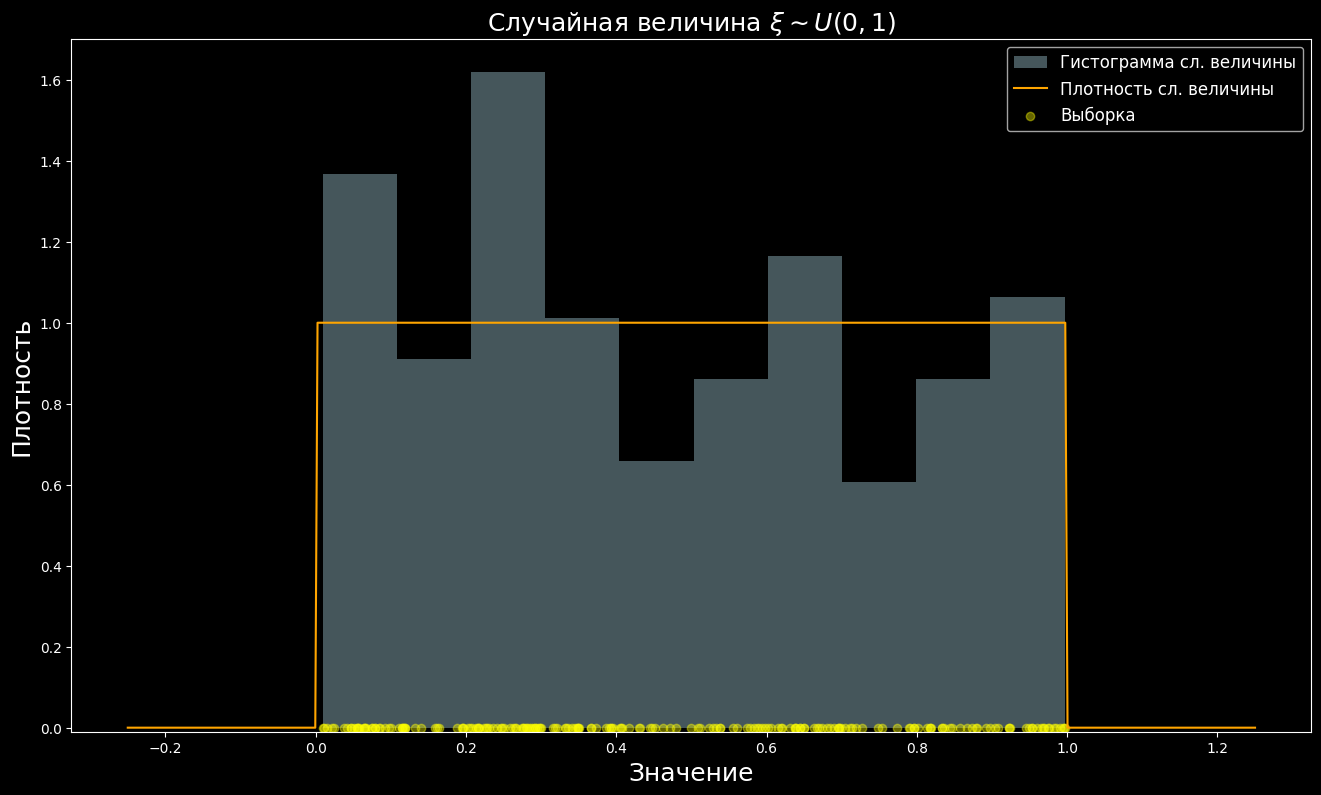

In [85]:
plot_uniform_density().show()

/tmp/ipykernel_17362/3067254015.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_uniform_different_precision().show()


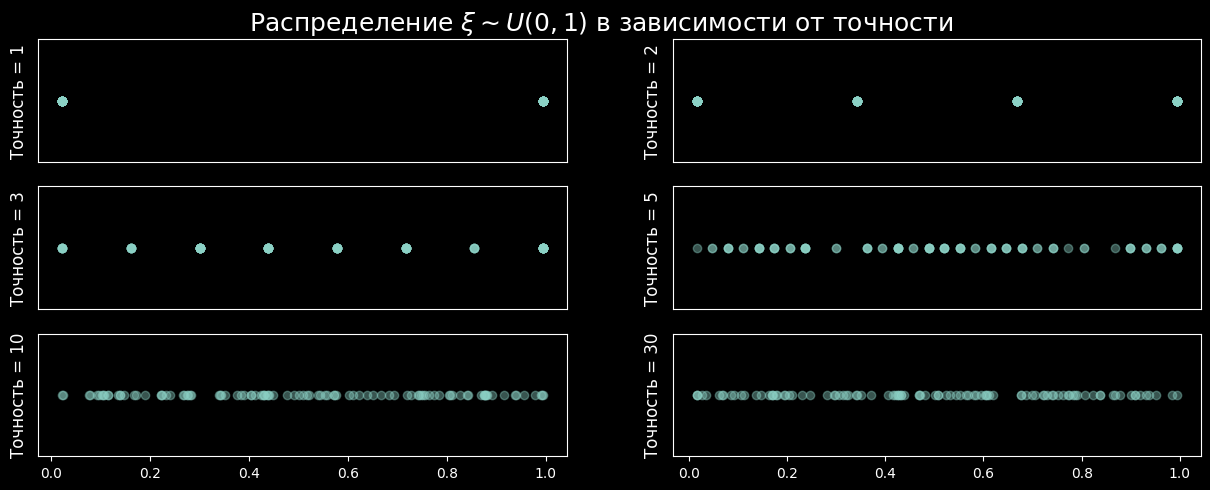

In [81]:
plot_uniform_different_precision().show()

/tmp/ipykernel_17362/3212600516.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_normal_density().show()


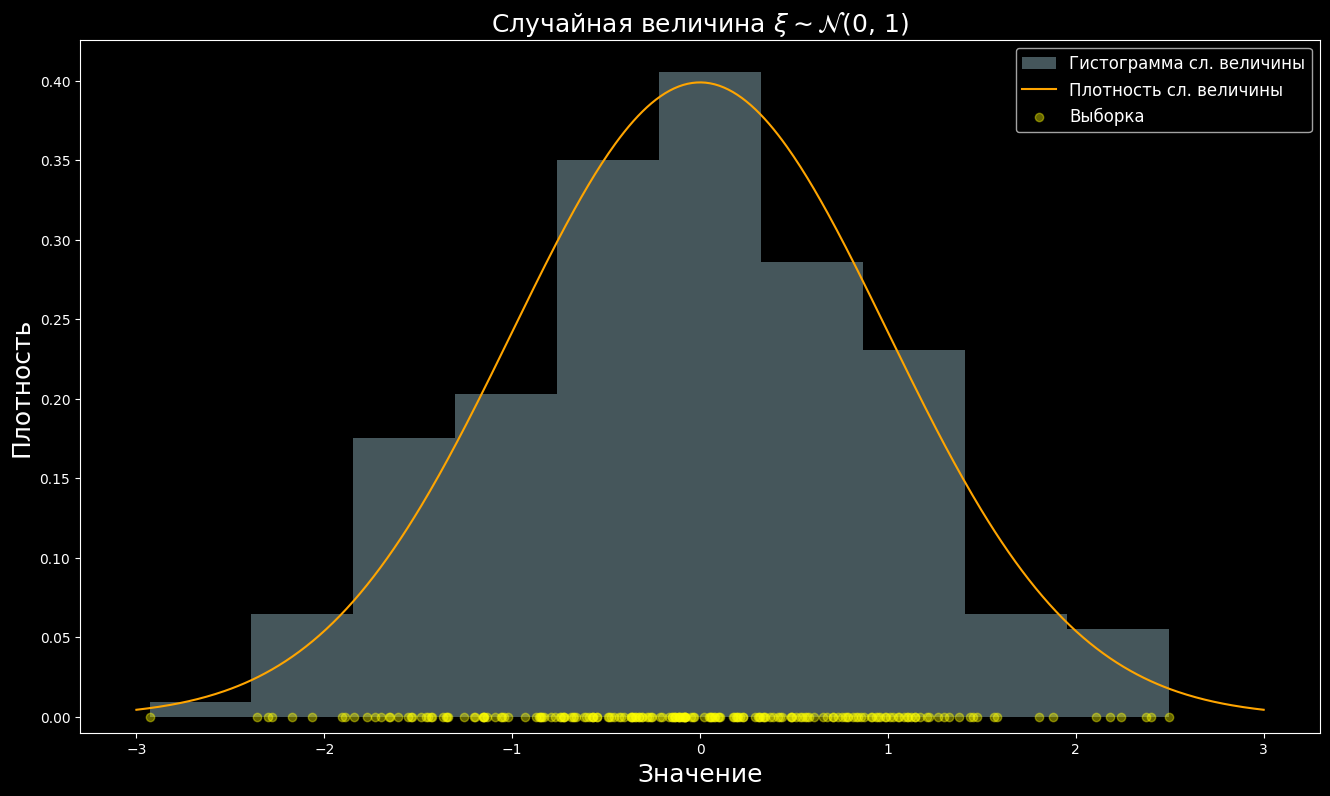

In [82]:
plot_normal_density().show()

/tmp/ipykernel_17362/994590073.py:1: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  plot_expon_density().show()


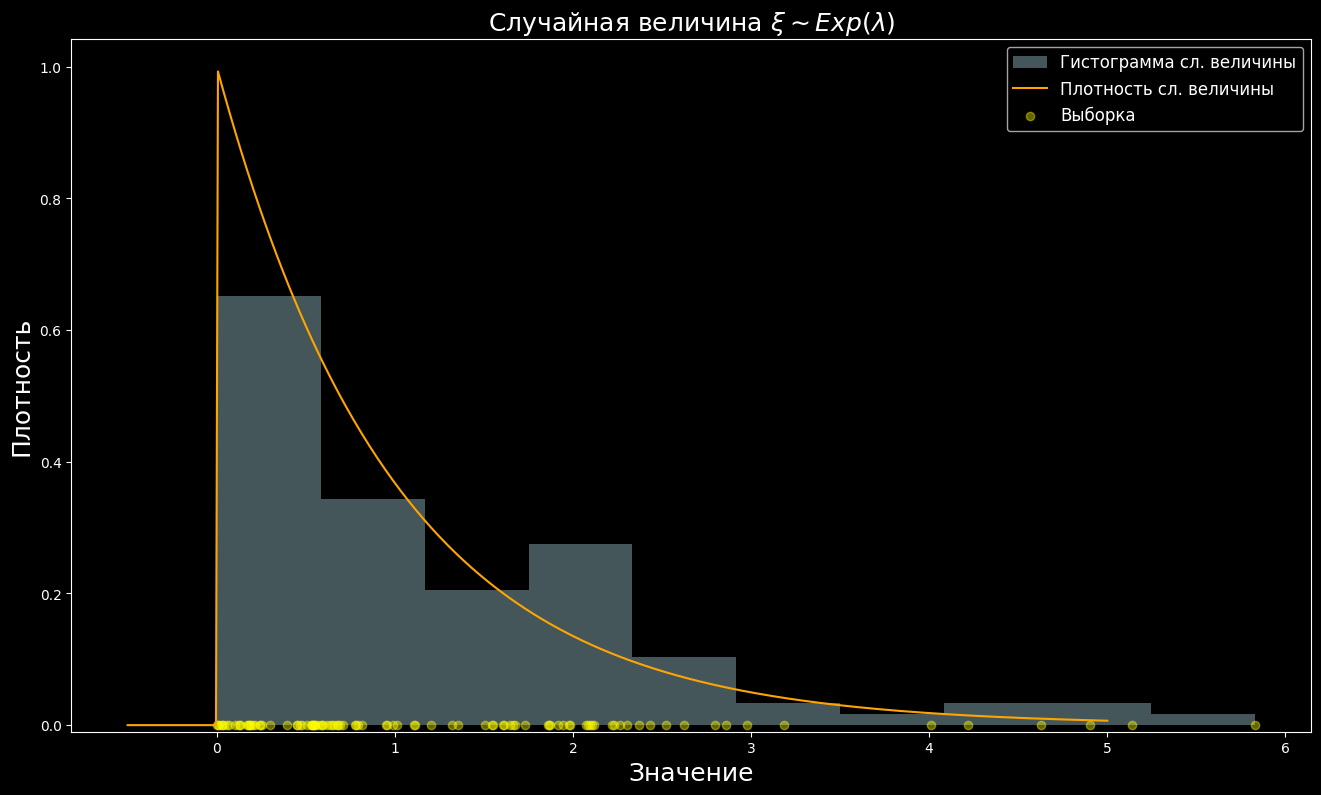

In [83]:
plot_expon_density().show()